Bibliotecas

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

---

Importando os dados


In [249]:
df = pd.read_csv('13_30_11-Dados.csv')

df

,millis,lat,lon,sat,alt,data,hora,altp,p,ax,ay,az,gx,gy,gz,pqd
0,7060,-22.590936,-42.764552,10,11.7,NaN,13:30:11,-0.10,1026.58,1.99,9.19,0.83,-0.08,0.01,0.00,0
1,7260,-22.590936,-42.764552,10,11.7,NaN,13:30:11,0.03,1026.57,1.91,9.36,0.71,-0.06,0.02,0.03,0
2,7460,-22.590936,-42.764552,10,11.7,NaN,13:30:11,-0.11,1026.59,1.99,9.40,0.89,-0.08,0.06,0.02,0
3,7660,-22.590936,-42.764552,10,11.7,NaN,13:30:11,-0.11,1026.59,1.79,9.26,0.91,-0.09,0.03,0.02,0
4,7911,-22.590937,-42.764552,10,11.7,2025/6/2,13:30:13,-0.30,1026.61,1.94,9.57,1.23,-0.12,0.03,0.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,475590,-22.590632,-42.765445,12,8.4,2025/6/2,13:38:0,109.49,1013.32,1.03,-4.33,-1.12,-0.23,0.78,0.25,0
1868,476463,-22.590503,-42.765532,11,-23.6,2025/6/2,13:38:1,65.33,1018.65,0.28,-5.04,-2.01,-0.20,0.93,0.32,1
1869,476706,-22.590503,-42.765532,11,-23.6,2025/6/2,13:38:1,51.02,1020.38,1.26,-5.34,-1.35,-0.21,0.54,0.06,1
1870,476947,-22.590379,-42.765614,11,-23.6,2025/6/2,13:38:2,36.58,1022.13,0.63,-5.48,0.39,0.03,0.48,0.04,1


---

Filtrando os dados de voo

In [250]:
threshold = df['altp'].mean() - 4
df_filtered = df[df['altp'] > threshold]

---

Obtendo o tempo de atividade

In [251]:
tempo_ativo = df['millis'].iloc[-1] - df['millis'].iloc[0]
tempo_ativo = tempo_ativo / 60000 # Tempo ativo em minutos

df_filtered.loc[:, 'millis'] = df_filtered['millis'] - df_filtered['millis'].iloc[0]
df_filtered['millis'] = df_filtered['millis'] / 1000  # Convertendo para segundos
tempo_voo = df_filtered['millis'].iloc[-1] - df_filtered['millis'].iloc[0]
tempo_voo = tempo_voo

print(f'Tempo ativo: {tempo_ativo:.2f} minutos')
print(f'Tempo de voo: {tempo_voo:.2f} segundos')

Tempo ativo: 7.84 minutos
Tempo de voo: 15.45 segundos


/tmp/ipykernel_11646/1609703742.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['millis'] = df_filtered['millis'] / 1000  # Convertendo para segundos


---

Dados do BMP280

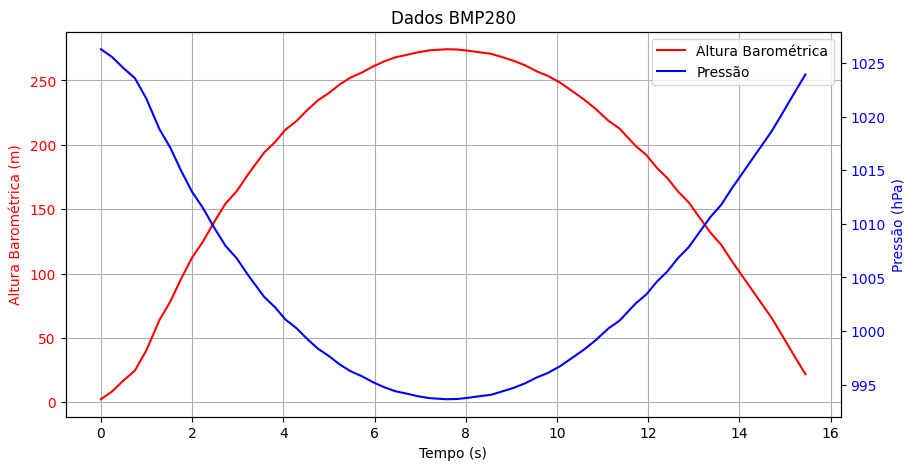

In [252]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(df_filtered['millis'], df_filtered['altp'], label='Altura Barométrica', color='red')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Altura Barométrica (m)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(df_filtered['millis'], df_filtered['p'], label='Pressão', color='blue')
ax2.set_ylabel('Pressão (hPa)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Legendas para ambos os eixos
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title('Dados BMP280')
plt.show()

---

Altura máxima

In [253]:
alt_max = df_filtered['altp'].max()

print(f'Altura máxima barométrica: {alt_max:.2f} m')

Altura máxima barométrica: 274.23 m


---

Acionamento do paraquedas

In [254]:
pqd_index = df_filtered[df_filtered['pqd'] == 1].index[0]
pqd_alt = df_filtered.loc[pqd_index, 'altp']
pqd_time = df_filtered.loc[pqd_index, 'millis']

print(f'Paraquedas aberto: {pqd_alt:.2f} m')

Paraquedas aberto: 65.33 m


---

Trajetória 1D

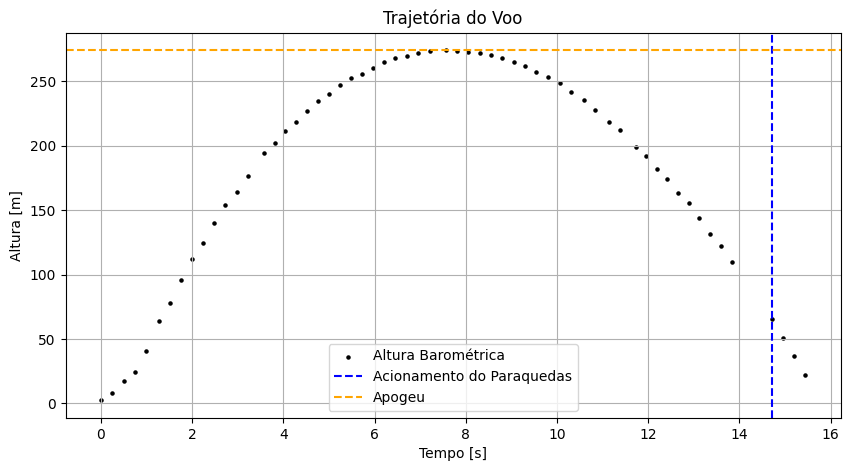

In [255]:
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['millis'], df_filtered['altp'], label='Altura Barométrica', color='black', s=5)
plt.axvline(x=pqd_time, color='blue', linestyle='--', label='Acionamento do Paraquedas')
plt.axhline(y=alt_max, color='orange', linestyle='--', label='Apogeu')
plt.title('Trajetória do Voo')
plt.xlabel('Tempo [s]')
plt.ylabel('Altura [m]')
plt.legend()
plt.grid()

/tmp/ipykernel_11646/501381041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['velocidade'] = df_filtered['altp'].diff() / df_filtered['millis'].diff()


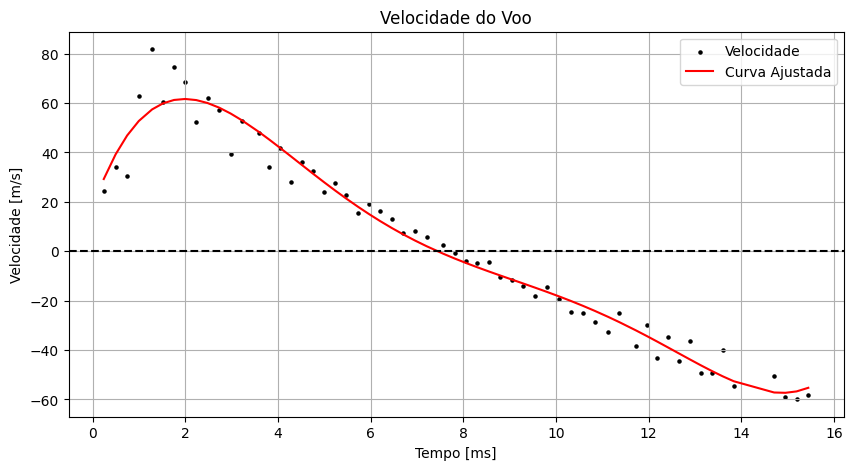

In [256]:
df_filtered['velocidade'] = df_filtered['altp'].diff() / df_filtered['millis'].diff()

# remove nan line
df_filtered = df_filtered.dropna(subset=['velocidade'])
# df_filtered['velocidade'] = df_filtered['velocidade'].abs()


def fit_curve(tempo, velocidade):
    def objective(x, a, b, c, d, e, f):
        return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

    popt, _ = curve_fit(objective, tempo, velocidade)
    return popt


def generate_curve(popt, x_values):
    a, b, c, d, e, f = popt
    return [(a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f for x in x_values], x_values


popt = fit_curve(df_filtered['millis'], df_filtered['velocidade'])
fitted_curve, xfitted = generate_curve(popt, df_filtered['millis'])

plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['millis'], df_filtered['velocidade'], label='Velocidade', color='black', s=5)
plt.plot(xfitted, fitted_curve, label='Curva Ajustada', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Velocidade do Voo')
plt.xlabel('Tempo [ms]')
plt.ylabel('Velocidade [m/s]')
plt.legend()
plt.grid()
plt.show()

---

Posição x,y

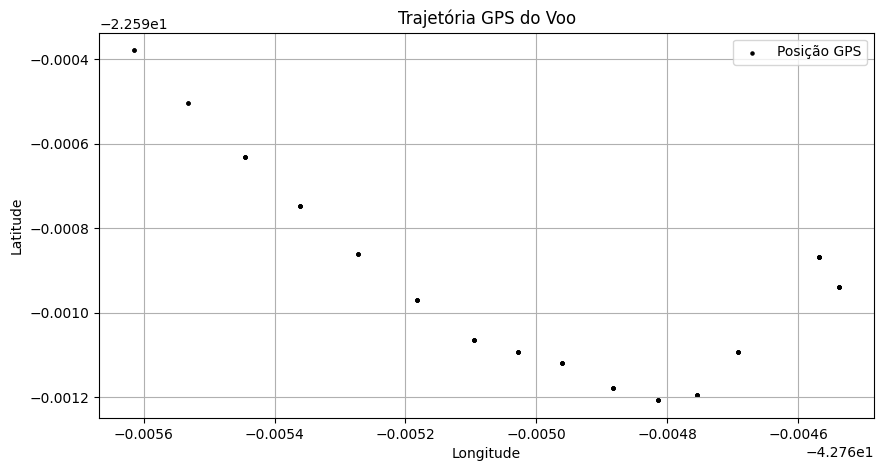

In [257]:
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['lon'], df_filtered['lat'], label='Posição GPS', color='black', s=5)
plt.title('Trajetória GPS do Voo')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.legend()
plt.grid()
plt.show()

---

Dados do acelerômetro

- Considerando o foguete "em pé", a ação da gravidade é na direção negativa do eixo Y

In [258]:
df['ay'].mean()

np.float64(8.169791666666669)

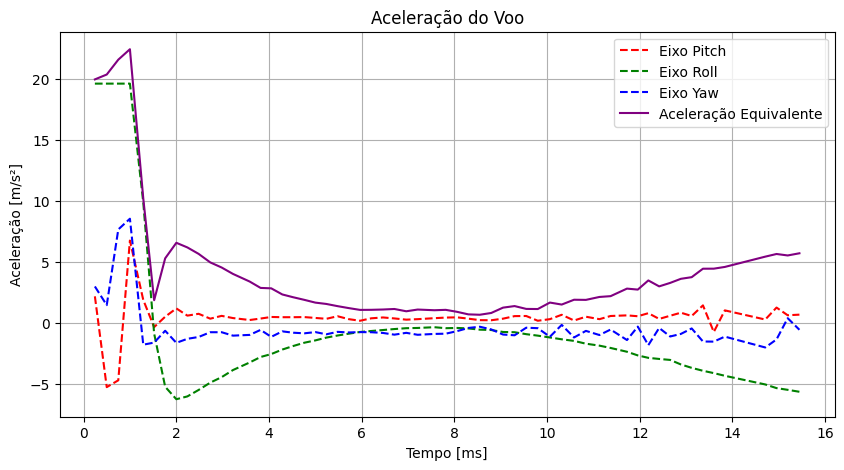

In [259]:
# Equivalente das acelerações 
def acceleration_equivalent(ax, ay, az):
    return (ax**2 + ay**2 + az**2)**0.5

plt.figure(figsize=(10, 5))
plt.plot(df_filtered['millis'], df_filtered['ax'], '--',label='Eixo Pitch', color='red') # Pitch axis
plt.plot(df_filtered['millis'], df_filtered['ay'], '--', label='Eixo Roll', color='green') # Roll axis
plt.plot(df_filtered['millis'], df_filtered['az'], '--', label='Eixo Yaw', color='blue') # Yaw axis
df_filtered['acc_equiv'] = acceleration_equivalent(df_filtered['ax'], df_filtered['ay'], df_filtered['az'])
plt.plot(df_filtered['millis'], df_filtered['acc_equiv'], label='Aceleração Equivalente', color='purple')
plt.title('Aceleração do Voo')
plt.xlabel('Tempo [ms]')
plt.ylabel('Aceleração [m/s²]')
plt.legend()
plt.grid()
plt.show()

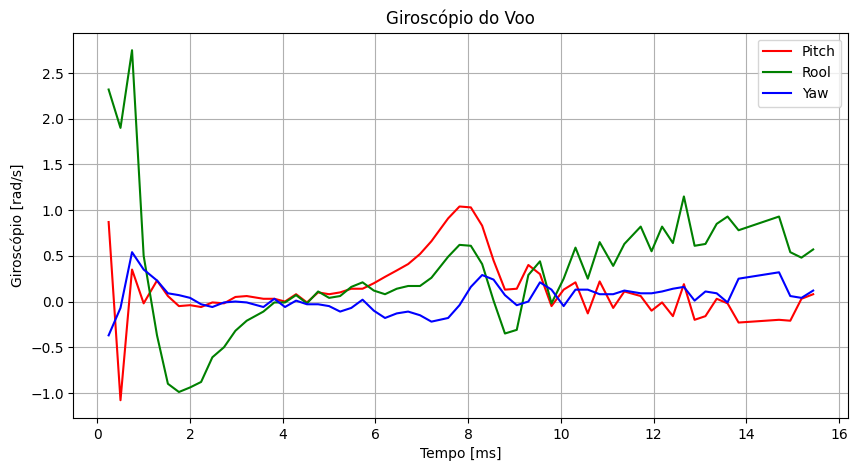

In [260]:
plt.figure(figsize=(10, 5))
plt.plot(df_filtered['millis'], df_filtered['gx'], label='Pitch', color='red') # Pitch axis
plt.plot(df_filtered['millis'], df_filtered['gy'], label='Rool', color='green') # Roll axis
plt.plot(df_filtered['millis'], df_filtered['gz'], label='Yaw', color='blue') # Yaw axis
plt.title('Giroscópio do Voo')
plt.xlabel('Tempo [ms]')
plt.ylabel('Giroscópio [rad/s]')
plt.legend()
plt.grid()
plt.show()

Interpretando os dados